# `AA Workshop 7` — Coding Challenge

Complete the tasks below to practice implementing classification modeling from `W7_Classification_Basic.ipynb`.

Guidelines:
- Work in order. Run each cell after editing with Shift+Enter.
- Keep answers short; focus on making things work.
- If a step fails, read the error and fix it.

By the end you will have exercised:
- implementing an SVM classifier
- understanding evaluation metrics such as precision recall curves

## Task 1 - Detecting Forged Banknotes

To practice implementing a support vector machine classification model, we will use a well-known dataset containing data extracted from images that were taken from genuine and forged banknote-like specimens. You can find the raw data as `BankNote_Authentication.csv` in the `data` directory. Familiarize yourself with the data [via this link](https://archive.ics.uci.edu/dataset/267/banknote+authentication). 
- Load and inspect the data. Create a pairplot to do so.
- Train an SVM model (using `LinearSVC`) using all available features. 
- Properly evaluate model performance using accuracy, precision and recall. To do so, a simple two-way split suffices as we are not tuning hyper-parameters.

In [10]:
import pandas as pd

data = pd.read_csv('../data/BankNote_Authentication.csv')
print(data.info())
display(data.head())
print(data['class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


class
0    762
1    610
Name: count, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['class'])
Y = data['class']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train_scaled, Y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

print("Training Set Evaluation:")
Y_train_pred = model.predict(X_train_scaled)
print(confusion_matrix(Y_train, Y_train_pred))
print("Accuracy:", round(accuracy_score(Y_train, Y_train_pred), 4))
print("Precision:", round(precision_score(Y_train, Y_train_pred), 4))
print("Recall:", round(recall_score(Y_train, Y_train_pred), 4))

print("\nTest Set Evaluation:")
Y_test_pred = model.predict(X_test_scaled)
print(confusion_matrix(Y_test, Y_test_pred))
print("Accuracy:", round(accuracy_score(Y_test, Y_test_pred), 4))
print("Precision:", round(precision_score(Y_test, Y_test_pred), 4))
print("Recall:", round(recall_score(Y_test, Y_test_pred), 4))

Training Set Evaluation:
[[603   6]
 [  2 486]]
Accuracy: 0.9927
Precision: 0.9878
Recall: 0.9959

Test Set Evaluation:
[[149   4]
 [  0 122]]
Accuracy: 0.9855
Precision: 0.9683
Recall: 1.0


## Task 2 - Understanding Precision-Recall Curves

You got to know several metrics to evaluate classifier performance. While accuracy, precision and recall are usually quite straightforward to interpret, ROC and Precision-Recall curves require a bit more thinking. In the notebook, we calculated the Precision-Recall Curve for our SVM model as follows:

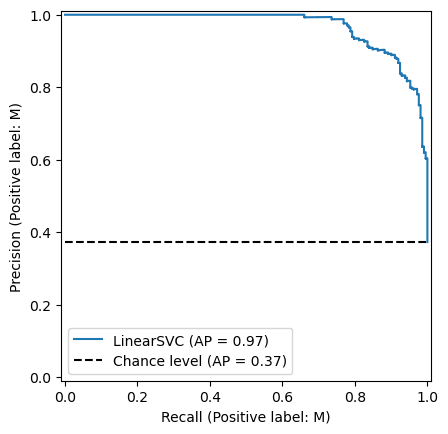

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

# prepare data
cancer_df = pd.read_csv("../data/breast_cancer.csv", index_col = "id")
X = np.array(cancer_df[['area_mean','concave points_mean']])
Y = cancer_df['diagnosis'].values
norm = StandardScaler()
X_norm = norm.fit_transform(X)

# model
model_SVM = LinearSVC(loss='hinge')
model_SVM.fit(X_norm, Y)


# generate curve
PrecisionRecallDisplay.from_estimator(model_SVM, X_norm, Y, plot_chance_level=True)
plt.show()

**Question**: Why is the chance level precision not at 50% (like for ROC curves)? Does it have to do with the data or the model? First, figure out the reason, then try to re-create the plot but with a 50% chance level precision.

In [3]:
(cancer_df['diagnosis'] == "M").mean()

np.float64(0.37258347978910367)

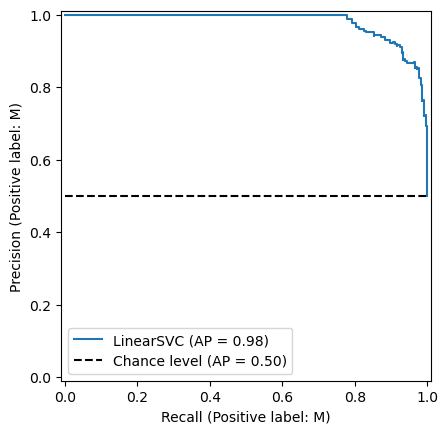

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import PrecisionRecallDisplay

pos = cancer_df[cancer_df['diagnosis']=='M']
neg = cancer_df[cancer_df['diagnosis']=='B']
n = min(len(pos), len(neg))
balanced = pd.concat([pos.sample(n, random_state=42), neg.sample(n, random_state=42)]).sample(frac=1, random_state=42)

X_bal = balanced[['area_mean','concave points_mean']].values
Y_bal = balanced['diagnosis'].values
scaler = StandardScaler()
X_bal_norm = scaler.fit_transform(X_bal)

model_bal = LinearSVC(loss='hinge')
model_bal.fit(X_bal_norm, Y_bal)

PrecisionRecallDisplay.from_estimator(model_bal, X_bal_norm, Y_bal, plot_chance_level=True)
plt.show()